In [4]:
%matplotlib inline

In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [6]:
img = cv2.imread(path)

NameError: name 'path' is not defined

In [30]:
# x, y, w, h
path = 'american-airlines-renv.png'
img = cv2.imread(path)
classes = {
    '1': 
    {
        'class_name': 'Rubik',
        'rect_color': '255,0,0',
        'text_color': '255,255,255'
    },
    '2': 
    {
        'class_name': 'Block',
        'rect_color': '0,255,0',
        'text_color': '0,0,0'
    }
}
objs = {
    'object1':
    {
        "class": 1,
        "discovered_time": "now",
        "score": 0.9532,
        "bbox": (10, 50, 265, 70)
    },
    'object2':
    {
        "class": 2,
        "discovered_time": "now",
        "score": 0.9414,
        "bbox": (275, 50, 240, 70)
    }
}

for (obj, v) in objs.items():
    x, y, w, h = v['bbox']
    rect_color = classes[str(v['class'])]['rect_color']
    text_color = classes[str(v['class'])]['text_color']
    rect_color = tuple(map(int, rect_color.split(',')))
    text_color = tuple(map(int, text_color.split(',')))
    # Main Rectangle
    img = cv2.rectangle(img, (x, y), (x+w, y+h), rect_color, thickness=3)

    # Top Rect
    class_str = classes[str(v['class'])]['class_name']
    class_str = f'Class: {class_str}'
    size = cv2.getTextSize(class_str, cv2.FONT_HERSHEY_SIMPLEX, 0.75, 2)
    img = cv2.rectangle(img, (x, y-33), (x+size[0][0]+10, y), rect_color, thickness=-1)
    img = cv2.putText(img, class_str, (x+5, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, text_color, 2)

    # Bottom Rect
    score_flt = v['score']
    score_str = f'Score: {score_flt*100:.2f}%'
    size = cv2.getTextSize(score_str, cv2.FONT_HERSHEY_SIMPLEX, 0.75, 2)
    img = cv2.rectangle(img, (x, y+h), (x+size[0][0]+10, y+h+30), rect_color, thickness=-1)
    img = cv2.putText(img, score_str, (x+5, y+h+22), cv2.FONT_HERSHEY_SIMPLEX, 0.75, text_color, 2)


In [34]:
size[0]

(173, 17)

In [32]:
tuple(map(int, '1,2,3'.strip('(').strip(')').split(',')))

(1, 2, 3)

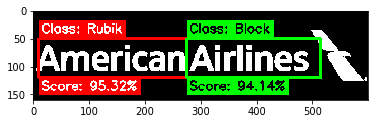

In [33]:
plt.imshow(img)